In [6]:
%run setup.py

# Read sample

In [7]:
stars = pd.read_excel(rootpath+'surface/sample/samples.xlsx')
idx = (stars['ifmodelling']==1)
#         & (kepler['numax']>0) & 
#        (kepler['m_h']>-0.4) & (kepler['m_h']<0.4) &
#        (kepler['ALPHA_M']<0.05) & (kepler['ALPHA_M']>-0.05)) | np.isin(kepler['names'],['Sun','mu Her']) # & np.isfinite(kepler['DPi1_V16'])

stars = stars.loc[idx,:].reset_index(drop=True)

modes = pd.read_excel(rootpath+'surface/sample/modes.xlsx')

In [20]:
# data_cols = ['star_mass', 'numax_scaling', 'radius', 'delta_nu_scaling', 'Teff', 'amlt', 'surf_a3', 'surf_corr_at_numax', 'Dnu_freq']
# table_cols = ['mass', 'numax', 'radius', 'Dnu', 'Teff', 'amlt', 'surf_a3', 'surf_corr_at_numax', 'Dnu_freq']


suf = '_micp'
original_cols = ['Dnu_freq_o', 'Dnu_freq', 'star_mass', 'radius', 'surf_corr_at_numax']
to_append_cols = [s+suf for s in ['Dnu_freq_o', 'Dnu_freq', 'mass', 'radius', 'surf_corr']]
to_append_e_cols = ['e_'+col for col in to_append_cols]

def multi(inputs):
    istar, star = inputs
    filepath = rootpath+'surface/results_spec_gaia_nu_sc/{:0.0f}/summary_prob.txt'.format(star['KIC'])
    if not os.path.exists(filepath): return [np.nan]*(len(to_append_cols)*2)
    data = ascii.read(filepath, delimiter=',')
    var = list(data[original_cols][1])
    e_var = list((np.array(list(data[original_cols][2])) - np.array(list(data[original_cols][0])))/2.)
    return var + e_var

r = process_map(multi, stars.iterrows(), total=len(stars), max_workers=12)
stars.loc[:, to_append_cols+to_append_e_cols]  = np.array(r)



suf = '_micps'
original_cols = ['Dnu_freq_o', 'Dnu_freq', 'star_mass', 'radius', 'surf_corr_at_numax']
to_append_cols = [s+suf for s in ['Dnu_freq_o', 'Dnu_freq', 'mass', 'radius', 'surf_corr']]
to_append_e_cols = ['e_'+col for col in to_append_cols]

def multi(inputs):
    istar, star = inputs
    filepath = rootpath+'surface/results_spec_gaia_nu_sc_sep/{:0.0f}/summary_prob.txt'.format(star['KIC'])
    if not os.path.exists(filepath): return [np.nan]*(len(to_append_cols)*2)
    data = ascii.read(filepath, delimiter=',')
    var = list(data[original_cols][1])
    e_var = list((np.array(list(data[original_cols][2])) - np.array(list(data[original_cols][0])))/2.)
    return var + e_var

r = process_map(multi, stars.iterrows(), total=len(stars), max_workers=12)
stars.loc[:, to_append_cols+to_append_e_cols]  = np.array(r)




suf = '_mic'
original_cols = ['Dnu_freq', 'Dnu_freq_sc', 'star_mass', 'radius', 'surf_corr_at_numax']
to_append_cols = [s+suf for s in ['Dnu_freq_o', 'Dnu_freq', 'mass', 'radius', 'surf_corr']]
to_append_e_cols = ['e_'+col for col in to_append_cols]

def multi(inputs):
    istar, star = inputs
    filepath = rootpath+'surface/results_spec_gaia_nu/{:0.0f}/summary_prob.txt'.format(star['KIC'])
    if not os.path.exists(filepath): return [np.nan]*(len(to_append_cols)*2)
    data = ascii.read(filepath, delimiter=',')
    var = list(data[original_cols][1])
    e_var = list((np.array(list(data[original_cols][2])) - np.array(list(data[original_cols][0])))/2.)
    return var + e_var

r = process_map(multi, stars.iterrows(), total=len(stars), max_workers=12)
stars.loc[:, to_append_cols+to_append_e_cols]  = np.array(r)


# for suffix in ['_micp', '_mic']: #, '_combined_linear']: #
#     gval = 'g'+suffix
#     dval = 'density'+suffix
#     mval = 'mass'+suffix
#     rval = 'radius'+suffix
#     e_gval = 'e_g'+suffix
#     e_dval = 'e_density'+suffix
#     e_mval = 'e_mass'+suffix
#     e_rval = 'e_radius'+suffix
#     stars[gval] = stars[mval]/stars[rval]**2.
#     stars[e_gval] = ((stars[e_mval]/stars[mval])**2.0 \
#                       + (2*stars[e_rval]/stars[rval])**2.0)**0.5 * stars[gval]
#     stars[dval] = stars[mval]/stars[rval]**3.
#     stars[e_dval] = ((stars[e_mval]/stars[mval])**2.0 \
#                       + (3*stars[e_rval]/stars[rval])**2.0)**0.5 * stars[dval]

  0%|          | 0/1294 [00:00<?, ?it/s]

  0%|          | 0/1294 [00:00<?, ?it/s]

  0%|          | 0/1294 [00:00<?, ?it/s]

# Dnu difference

In [21]:
yu = pd.read_csv('../../database/catalog/yu+2018.csv')[["KIC", "Delnu"]]
stars = stars.merge(yu, on='KIC', how='left')

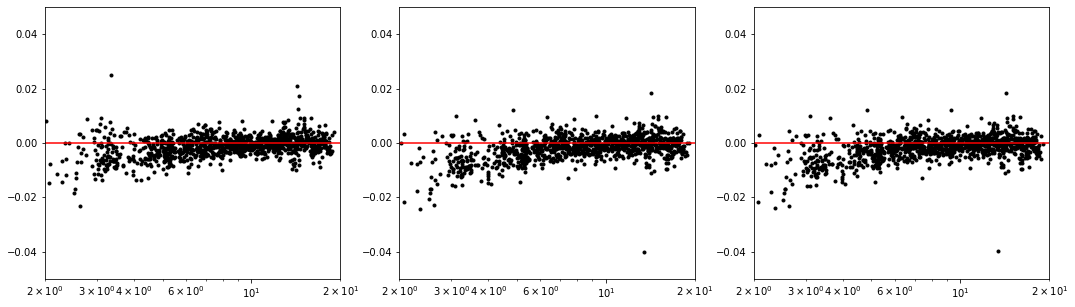

In [22]:
import matplotlib.colors

fig, axes = plt.subplots(figsize=(18,5), nrows=1, ncols=3, squeeze=False)
axes = axes.reshape(-1)

sufs = ['_mic', '_micp', '_micps']
for iax, ax in enumerate(axes):
    val = 'Dnu_freq'+sufs[iax]
    ax.scatter(stars['Dnu'], stars[val]/stars['Delnu']-1, marker='.', color='k')
    ax.set_xlim(2,20)
    ax.set_xscale('log')
    ax.set_ylim(-0.05, 0.05)
    ax.axhline(0, linestyle='-', color='r')

# surface effect on the HR diagram
## overview

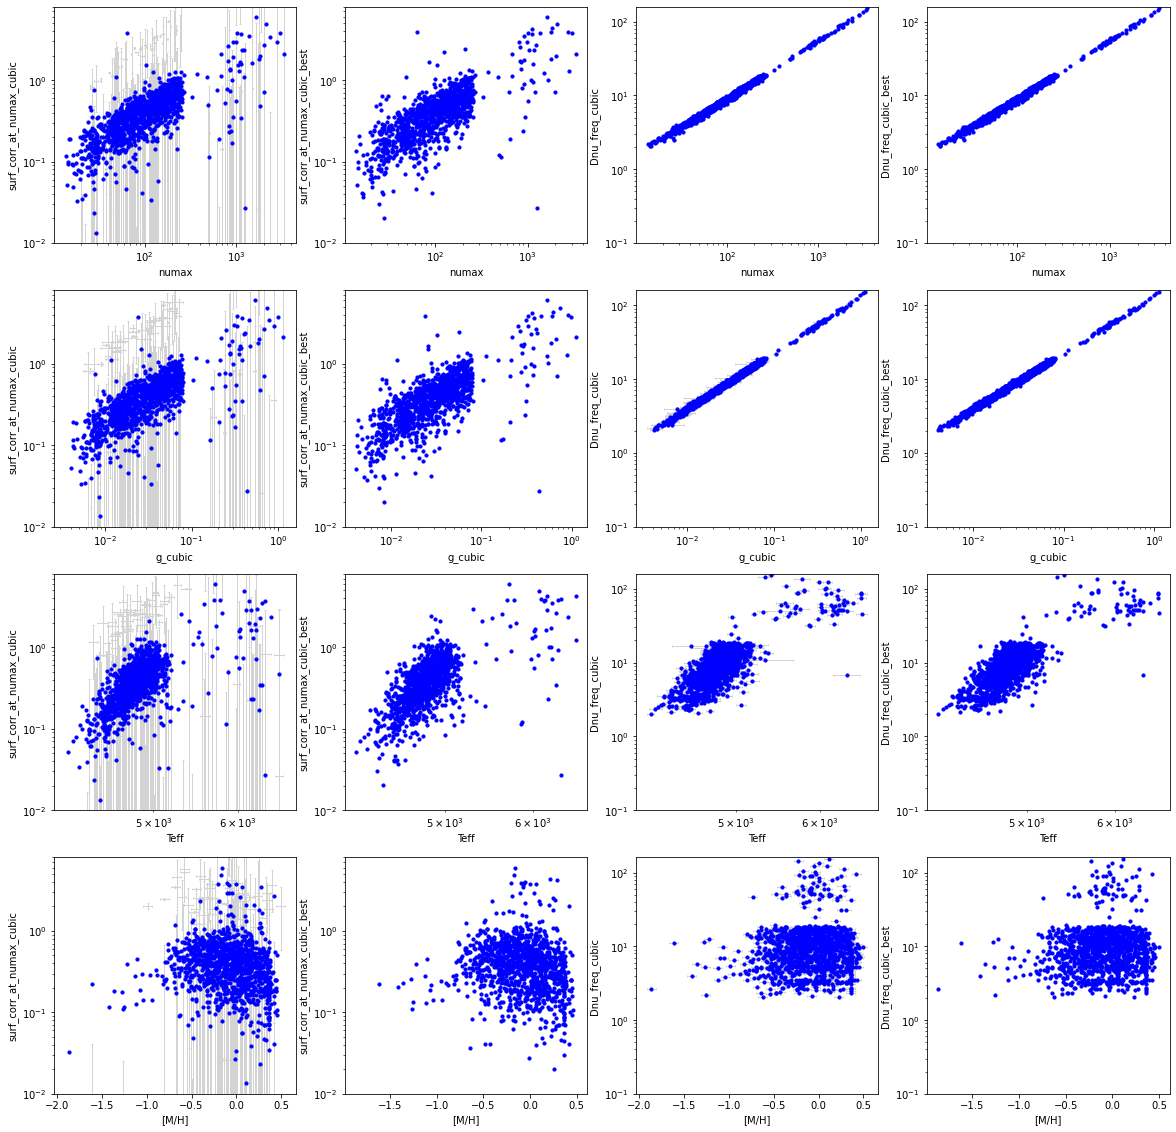

In [12]:
import matplotlib.colors

fig, axes = plt.subplots(figsize=(20,20), nrows=4, ncols=4, squeeze=False)
# axes = axes.reshape(-1)

# idx = ((kepler['numax']>0) & (kepler['ALPHA_M']<0.05) & (kepler['ALPHA_M']>-0.05)) |(kepler['names']=='Sun') # & np.isfinite(kepler['DPi1_V16'])
# sample = kepler.loc[idx,:]
sample = stars.loc[:,:]

errorstyle = {'elinewidth':1, 'capsize':1, 'ecolor':'lightgray', 'linestyle':'None', 'zorder':-10}

yvars = ['surf_corr_at_numax_cubic', 'surf_corr_at_numax_cubic_best', 'Dnu_freq_cubic', 'Dnu_freq_cubic_best']
xvars = ['numax', 'g_cubic', 'Teff', '[M/H]']
for iy, yvar in enumerate(yvars):
    for ix, xvar in enumerate(xvars):
        ax = axes[ix,iy]
        if yvar in ['surf_corr_at_numax_cubic', 'surf_corr_at_numax_cubic_best']:
            ax.scatter(sample.loc[:,xvar], -sample.loc[:,yvar], marker='o', color='b', s=10, )
            # ax.scatter(sample.loc[:,xvar], sample.loc[:,yvar], marker='o', color='r', s=10, )
        else:
            ax.scatter(sample.loc[:,xvar], sample.loc[:,yvar], marker='o', color='b', s=10, )
            
        if not yvar in ['surf_corr_at_numax_cubic_best', 'Dnu_freq_cubic_best']:
            ax.errorbar(sample.loc[:,xvar], sample.loc[:,yvar], 
                    xerr=sample.loc[:,'e_'+xvar], yerr=sample.loc[:,'e_'+yvar], **errorstyle)

        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        
        if xvar in ['numax', 'Teff', 'g_cubic']: 
            ax.set_xscale('log')
            
        if yvar in ['surf_corr_at_numax_cubic', 'surf_corr_at_numax_cubic_best']:
            ax.set_ylim(0.01, 8.)
        if yvar in ['Dnu_freq_cubic', 'Dnu_freq_cubic_best']:
            ax.set_ylim(0.1, 160.)
        
        ax.set_yscale('log')

## iterative minimization

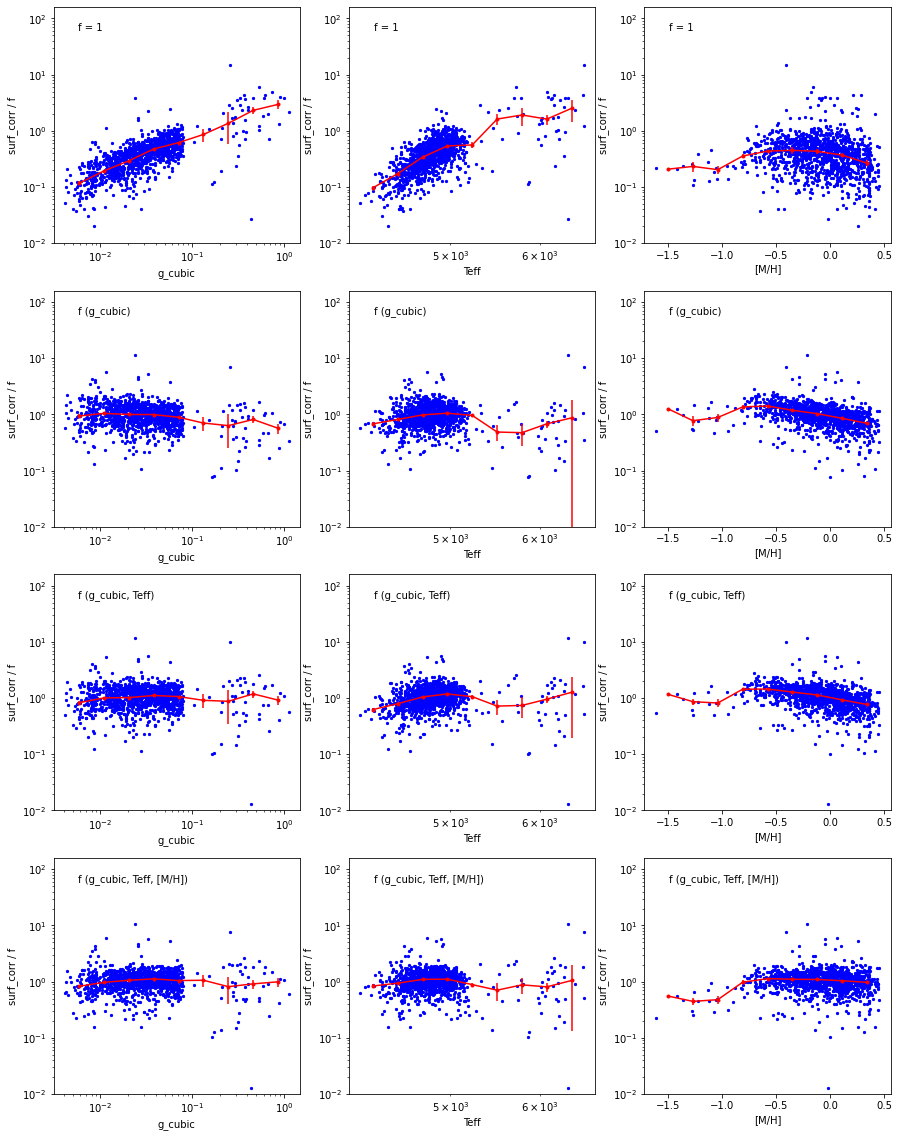

In [58]:
idx = (stars['surf_corr_at_numax_cubic_best']<0) \
    & np.isfinite(stars['g_cubic']) \
    & np.isfinite(stars['Teff']) \
    & np.isfinite(stars['[M/H]'])
sample = stars.loc[idx,:].reset_index(drop=True)

from scipy.optimize import curve_fit
import matplotlib.colors
fig, axes = plt.subplots(figsize=(15,20), nrows=4, ncols=3, squeeze=False)
# axes = axes.reshape(-1)

yvar = 'surf_corr_at_numax_cubic_best'
xvars = ['g_cubic', 'Teff', '[M/H]']

for irow in range(4):
    for icol in range(3):
        ax = axes[irow,icol]
#         if icol>=irow:
        if irow==0:
            y = - sample.loc[:,yvar]
        else:
            def func(x, *params):
                Npara = x.shape[1]
                res = np.zeros(x.shape[0])
                for ipara in range(Npara):
                    res += x[:,ipara] * params[ipara]
                res += params[-1]
                return res
            xdata = np.array([sample.loc[:,xv] if xv=='[M/H]' else np.log10(sample.loc[:,xv]) for xv in xvars[0:irow]]).T
            ydata = np.log10(-np.array(sample.loc[:,yvar]))
            popt, pcov = curve_fit(func, xdata, ydata, p0=np.ones(xdata.shape[1]))

            yfit = func(xdata, *popt)
            y = 10.0**ydata/10.0**yfit

        x = np.array(sample.loc[:,xvars[icol]])

        ax.scatter(x, y, marker='o', color='b', s=5, )
        
        if xvars[icol] != '[M/H]':
            xcs, medians, stds = se.get_binned_median(x, y, np.logspace(np.log10(min(x)), np.log10(max(x)), num=10, base=10))
        else:
            xcs, medians, stds = se.get_binned_median(x, y, np.linspace(min(x), max(x), 10))
        ax.errorbar(xcs, medians, yerr=stds, fmt='r.-')
        
        if xvars[icol] in ['Teff', 'g_cubic']: 
            ax.set_xscale('log')
        ax.set_ylim(0.01, 160.)
        ax.set_ylabel('surf_corr / f')
        if irow==0:
            ax.text(0.1, 0.9, 'f = 1', transform=ax.transAxes)
        else:
            ax.text(0.1, 0.9, 'f ({:s}) '.format(', '.join(xvars[0:irow])), transform=ax.transAxes)

        ax.set_xlabel(xvars[icol])

        ax.set_yscale('log')
#         else:
#             ax.axis('off')
        

In [56]:
icol

2

idx = kepler['surf_corr_at_numax']>10

KIC 7668623, KIC 8150065, and KIC 11081729 all have very fishy seismic models.

New data creating scheme:
- only include (kepler['surf_corr_at_numax']<0) & (kepler['surf_corr_at_numax_max']<0) stars
- Dnu, and numax within 15% models
- only include surface_at_numax <0 models
- resample the grid: x time smaller by timestep

0       3429205
1       3640905
7       7799349
8       8179973
11     10272858
         ...   
811     7037405
813     8410637
816     9540226
817     9970396
821     4663623
Name: KIC, Length: 476, dtype: int64

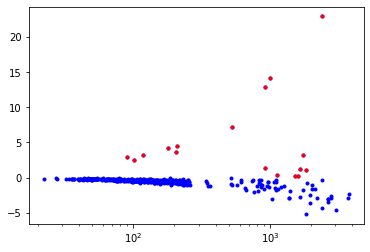

In [231]:
# plt.plot(kepler['numax'],kepler['surf_corr_at_numax_max'], 'k.')
idx = kepler['surf_corr_at_numax']>0
plt.plot(kepler['numax'],kepler['surf_corr_at_numax'], 'b.')
plt.plot(kepler.loc[idx,'numax'],kepler.loc[idx,'surf_corr_at_numax'], 'r.')
plt.xscale('log')

idx = (kepler['surf_corr_at_numax']<0) & (kepler['surf_corr_at_numax_max']<0)
kepler.loc[idx,'KIC']

In [246]:
from IPython.display import Image
# Image(rootpath+"hpc/coarse_v2/results/011081729/echelle_top10_prob_seismic.png")
# Image(rootpath+"hpc/coarse_v2/results/011081729/corner_prob_classic.png")
# Image(rootpath+"hpc/coarse_v2/results/011081729/corner_prob_seismic.png")
# Image(rootpath+"hpc/coarse_v2/results/011081729/corner_prob.png")

# Fit absolute value: surf_corr_at_numax

In [236]:
from scipy.optimize import curve_fit

def model1(xdata, a, b):
    g= xdata[:]
    ypredict = a * (g)**b 
    return ypredict

def model2(xdata, a, b, c):
    g, Teff = xdata[:,0], xdata[:,1]
    ypredict = a * (g)**b * (Teff/5777.)**c
    return ypredict

def model3(xdata, a, b, c):
    mass, radius = xdata[:,0], xdata[:,1]
    ypredict = a * (mass)**b * (radius)**c
    return ypredict

## metallicity dependence

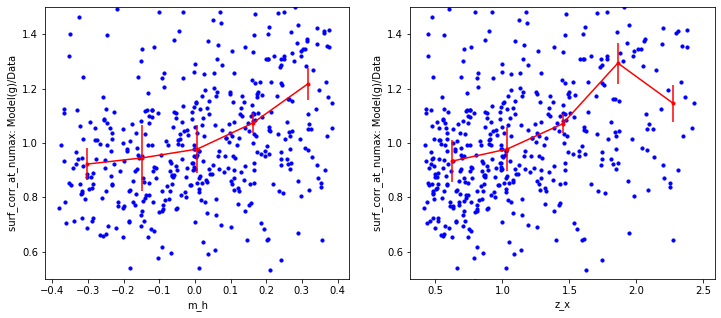

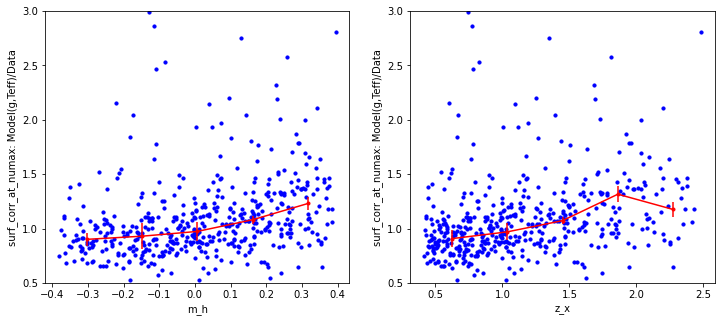

In [137]:
idx = np.isfinite(kepler['g']) & np.isfinite(kepler['Teff']) \
    & (kepler['surf_corr_at_numax']<0) 
sample = kepler.loc[idx,:].reset_index(drop=True)
sample['z_x'] = 10.0**sample['m_h']

xdata = np.array(sample['g'])
ydata = np.array(sample['surf_corr_at_numax'])
popt, pcov = curve_fit(model1, xdata, ydata)
ymodel = model1(xdata, *popt)

fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'z_x']
for iax, ax in enumerate(axes):
    y = ymodel/ydata
    x = sample.loc[:,var[iax]]
    ax.scatter(x,y, marker='o', color='b', s=10, )
    ax.set_ylabel('surf_corr_at_numax: Model(g)/Data')
    ax.set_ylim(0.5,1.5)
    ax.set_xlabel(var[iax])
    xcs, medians, stds = se.get_binned_median(x,y,np.linspace(min(x),max(x),6))
    ax.errorbar(xcs, medians, yerr=stds, fmt='r.-')

    

xdata = np.swapaxes(np.array([sample['g'], sample['Teff']]), 0, 1)
ydata = np.array(sample['surf_corr_at_numax'])
popt, pcov = curve_fit(model2, xdata, ydata)
ymodel = model2(xdata, *popt)

fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'z_x']
for iax, ax in enumerate(axes):
    y = ymodel/ydata
    x = sample.loc[:,var[iax]]
    ax.scatter(x,y, marker='o', color='b', s=10, )
    ax.set_ylabel('surf_corr_at_numax: Model(g,Teff)/Data')
    ax.set_ylim(0.5,3.)
    ax.set_xlabel(var[iax])
    xcs, medians, stds = se.get_binned_median(x,y,np.linspace(min(x),max(x),6))
    ax.errorbar(xcs, medians, yerr=stds, fmt='r.-')
idx=np.abs(y-1)>1.

## Fit with g, Teff, and M/H

In [305]:
# def model_exp(xdata, a, b, c, d):
#     g, Teff, feh = xdata[:,0], xdata[:,1], xdata[:,2]
#     ypredict = a * (g)**b * (Teff/5777.)**c * (10.0**feh)**d
#     return ypredict

def model_linear(xdata, a, b, c, d):
    g, Teff, mh = xdata[:,0], xdata[:,1], xdata[:,2]
    ypredict = a * (g)**b * (Teff/5777.)**c * (d*mh + 1)
    return ypredict

# def model_quadratic(xdata, a, b, c, d, e):
#     g, Teff, feh = xdata[:,0], xdata[:,1], xdata[:,2]
#     ypredict = a * (g)**b * (Teff/5777.)**c * (d*feh + e*feh**2. + 1)
#     return ypredict

# def model_linear_fundamental(xdata, a, b, c, d):
#     mass, radius, feh = xdata[:,0], xdata[:,1], xdata[:,2]
#     ypredict = a * (mass)**b * (radius)**c * (d*feh + 1)
#     return ypredict

-3.0265, 0.8397, -4.7735, -0.9918  chi2 34.3193


Text(0.5, 0, 'ydata')

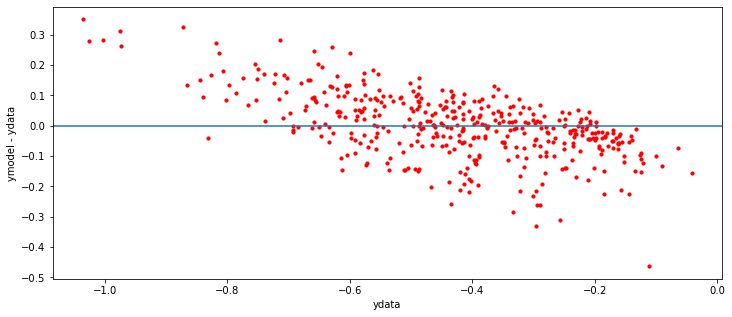

In [306]:
from scipy.optimize import basinhopping

idx = np.isfinite(kepler['g']) & np.isfinite(kepler['Teff']) \
    & (kepler['surf_corr_at_numax']<0) & (kepler['surf_a3']<0) & np.isin(kepler['stage'],['rgb']) #& (kepler['stage']=='rgb')
sample = kepler.loc[idx,:].reset_index(drop=True)

xdata = np.swapaxes(np.array([sample['g'], sample['Teff'], sample['m_h']]), 0, 1)
# xdata_fundamental = np.swapaxes(np.array([sample['mass'], sample['radius'], sample['m_h']]), 0, 1)
ydata = np.array(sample['surf_corr_at_numax'])

# popt, pcov = curve_fit(model_exp, xdata, ydata, p0=[-6, 1.25, -9., -0.5])
# ymodel_exp = model_exp(xdata, *popt)
# sample['surf_corr_at_numax_exp'] = ymodel_exp
# print(*popt)

chi2 = lambda theta: np.sum((ydata-model_linear(xdata, *theta))**2.0)
res = basinhopping(chi2, [-6, 1.0, -7, -1.])
ymodel_linear = model_linear(xdata, *res.x)
print(', '.join(['{:0.4f}']*4).format(*res.x),' chi2 {:0.4f}'.format(np.sum(np.abs( ymodel_linear-ydata))) )
sample['surf_corr_at_numax_linear'] = ymodel_linear

# popt, pcov = curve_fit(model_linear_fundamental, xdata_fundamental, ydata, p0=[-5., 1.25, -1., -0.5])
# ymodel_linear_fundamental = model_linear_fundamental(xdata_fundamental, *popt)
# print(*popt,'chi2',np.sum(np.abs( ymodel_linear_fundamental-ydata)))
# sample['surf_corr_at_numax_linear_fundamental'] = ymodel_linear_fundamental

# popt, pcov = curve_fit(model_quadratic, xdata, ydata, p0=[-6, 1.25, -9., 0.5, 0.2])
# ymodel_quadratic = model_quadratic(xdata, *popt)
# print(*popt)
# sample['surf_corr_at_numax_quadratic'] = ymodel_quadratic

fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=1, squeeze=False)
axes = axes.reshape(-1)

xvar = ydata#sample['numax']
# axes[0].scatter(xvar, ymodel_exp-ydata, marker='o', color='b', s=10, )
axes[0].scatter(xvar, ymodel_linear-ydata, marker='o', color='r', s=10, )
# axes[0].scatter(xvar, ymodel_linear_fundamental-ydata, marker='o', color='b', s=10, )
# axes[0].scatter(xvar, ymodel_quadratic-ydata, marker='o', color='g', s=10, )

# axes[0].set_ylim(0,2)
# axes[0].set_yscale('log')

axes[0].axhline(0)
axes[0].set_ylabel('ymodel - ydata')
axes[0].set_xlabel('ydata')
# xcs, medians, stds = se.get_binned_median(x,y,np.linspace(min(x),max(x),6))
# ax.errorbar(xcs, medians, yerr=stds, fmt='r.-')

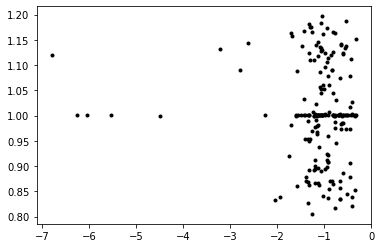

In [229]:
idx = (np.abs(kepler['surf_corr_at_numax_max']/kepler['surf_corr_at_numax']-1)<0.2) & (kepler['surf_corr_at_numax']<0.)
plt.plot(kepler.loc[idx,'surf_corr_at_numax'], kepler.loc[idx,'surf_corr_at_numax_max']/kepler.loc[idx,'surf_corr_at_numax'], 'k.')

In [189]:
idx= sample['KIC']==0
# idx=((ymodel_exp/ydata) >8)
sample.loc[idx,['KIC', 'numax', 'Teff', 'm_h', 'g', 'surf_corr_at_numax', 'surf_corr_at_numax_max','surf_corr_at_numax_exp','surf_corr_at_numax_linear', 'surf_corr_at_numax_quadratic']]

,KIC,numax,Teff,m_h,g,surf_corr_at_numax,surf_corr_at_numax_max,surf_corr_at_numax_exp,surf_corr_at_numax_linear,surf_corr_at_numax_quadratic
57,0,3031.038387,5793.781131,0.0,0.982289,-6.258214,-6.261526,-6.806412,-6.809413,-6.658275


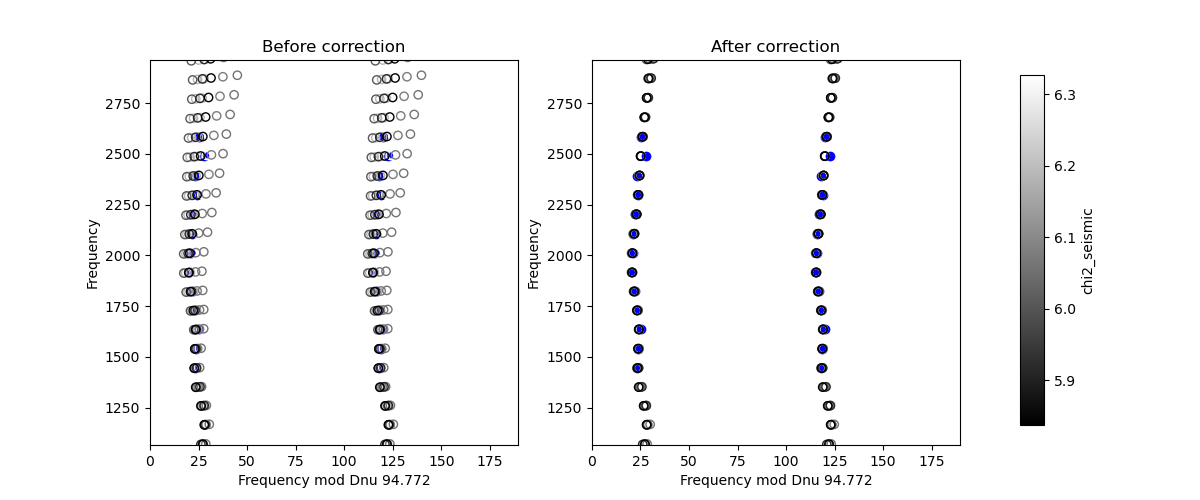

In [188]:
from IPython.display import Image
# Image(rootpath+"hpc/coarse_v2/results/003633751/echelle_top10_prob_seismic.png")
Image(rootpath+"hpc/coarse_v2/results/008179536/echelle_top10_prob_seismic.png")
# Image(rootpath+"hpc/coarse_v2/results/008150065/corner_prob_classic.png")
# Image(rootpath+"hpc/coarse_v2/results/008150065/corner_prob_seismic.png")
# Image(rootpath+"hpc/coarse_v2/results/008150065/corner_prob.png")

(3500, 10)

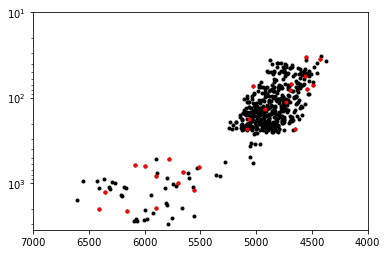

In [81]:
plt.plot(sample['Teff'], sample['numax'], 'k.')
plt.plot(sample.loc[idx,'Teff'], sample.loc[idx,'numax'], 'r.')
plt.yscale('log')
plt.xlim(7000,4000)
plt.ylim(3500,10)

In [15]:
stars[stars['stage']=='rgb'].sort_values('numax')[['KIC','numax']]

,KIC,numax
1038,10864433,13.83
314,5376348,14.36
340,5541499,14.58
1094,11298877,14.70
378,5785710,14.92
...,...,...
401,5961985,255.58
345,5553307,257.36
1057,11043770,257.66
1017,10675916,268.27


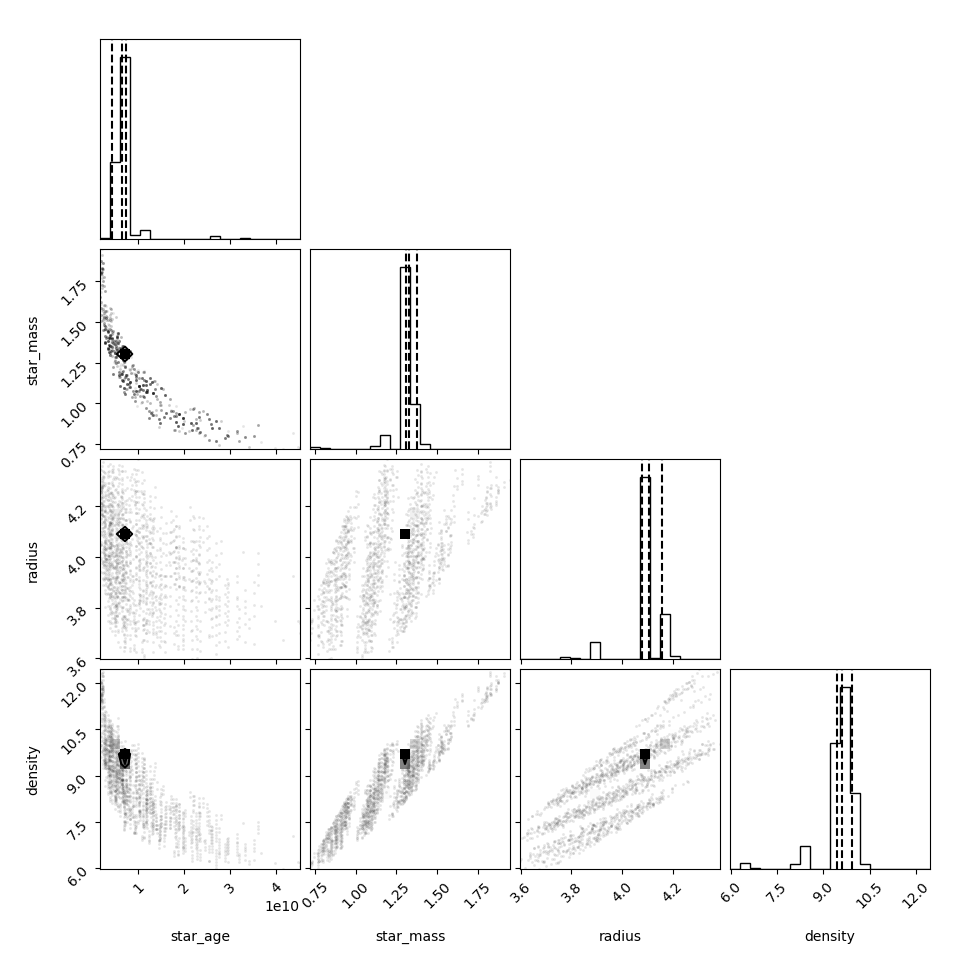

In [16]:
from IPython.display import Image
# Image(rootpath+'hpc/coarse_v2/results/005955122/echelle_top10_prob_seismic.png')
Image('results_spec_gaia_nu/10675916/corner_prob.png')

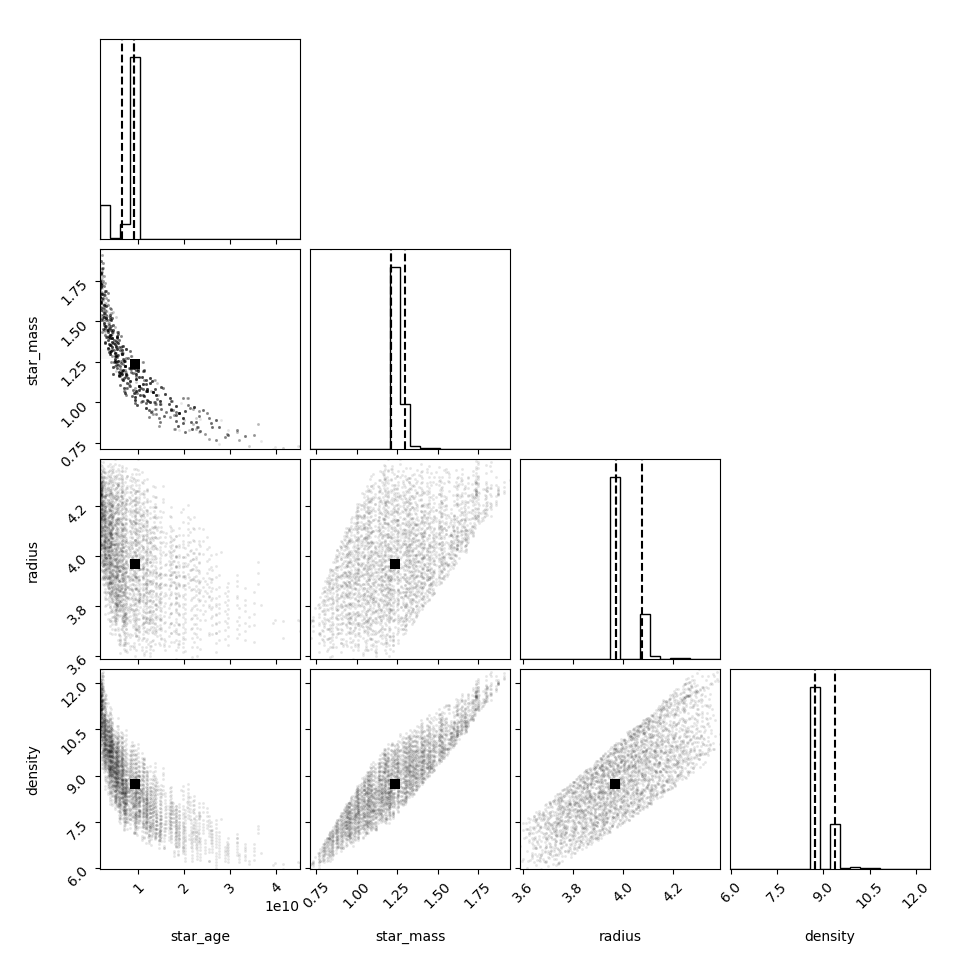

In [17]:
from IPython.display import Image
# Image(rootpath+'hpc/coarse_v2/results/005955122/echelle_top10_prob_seismic.png')
Image('results_spec_gaia_nu_sc/10675916/corner_prob.png')

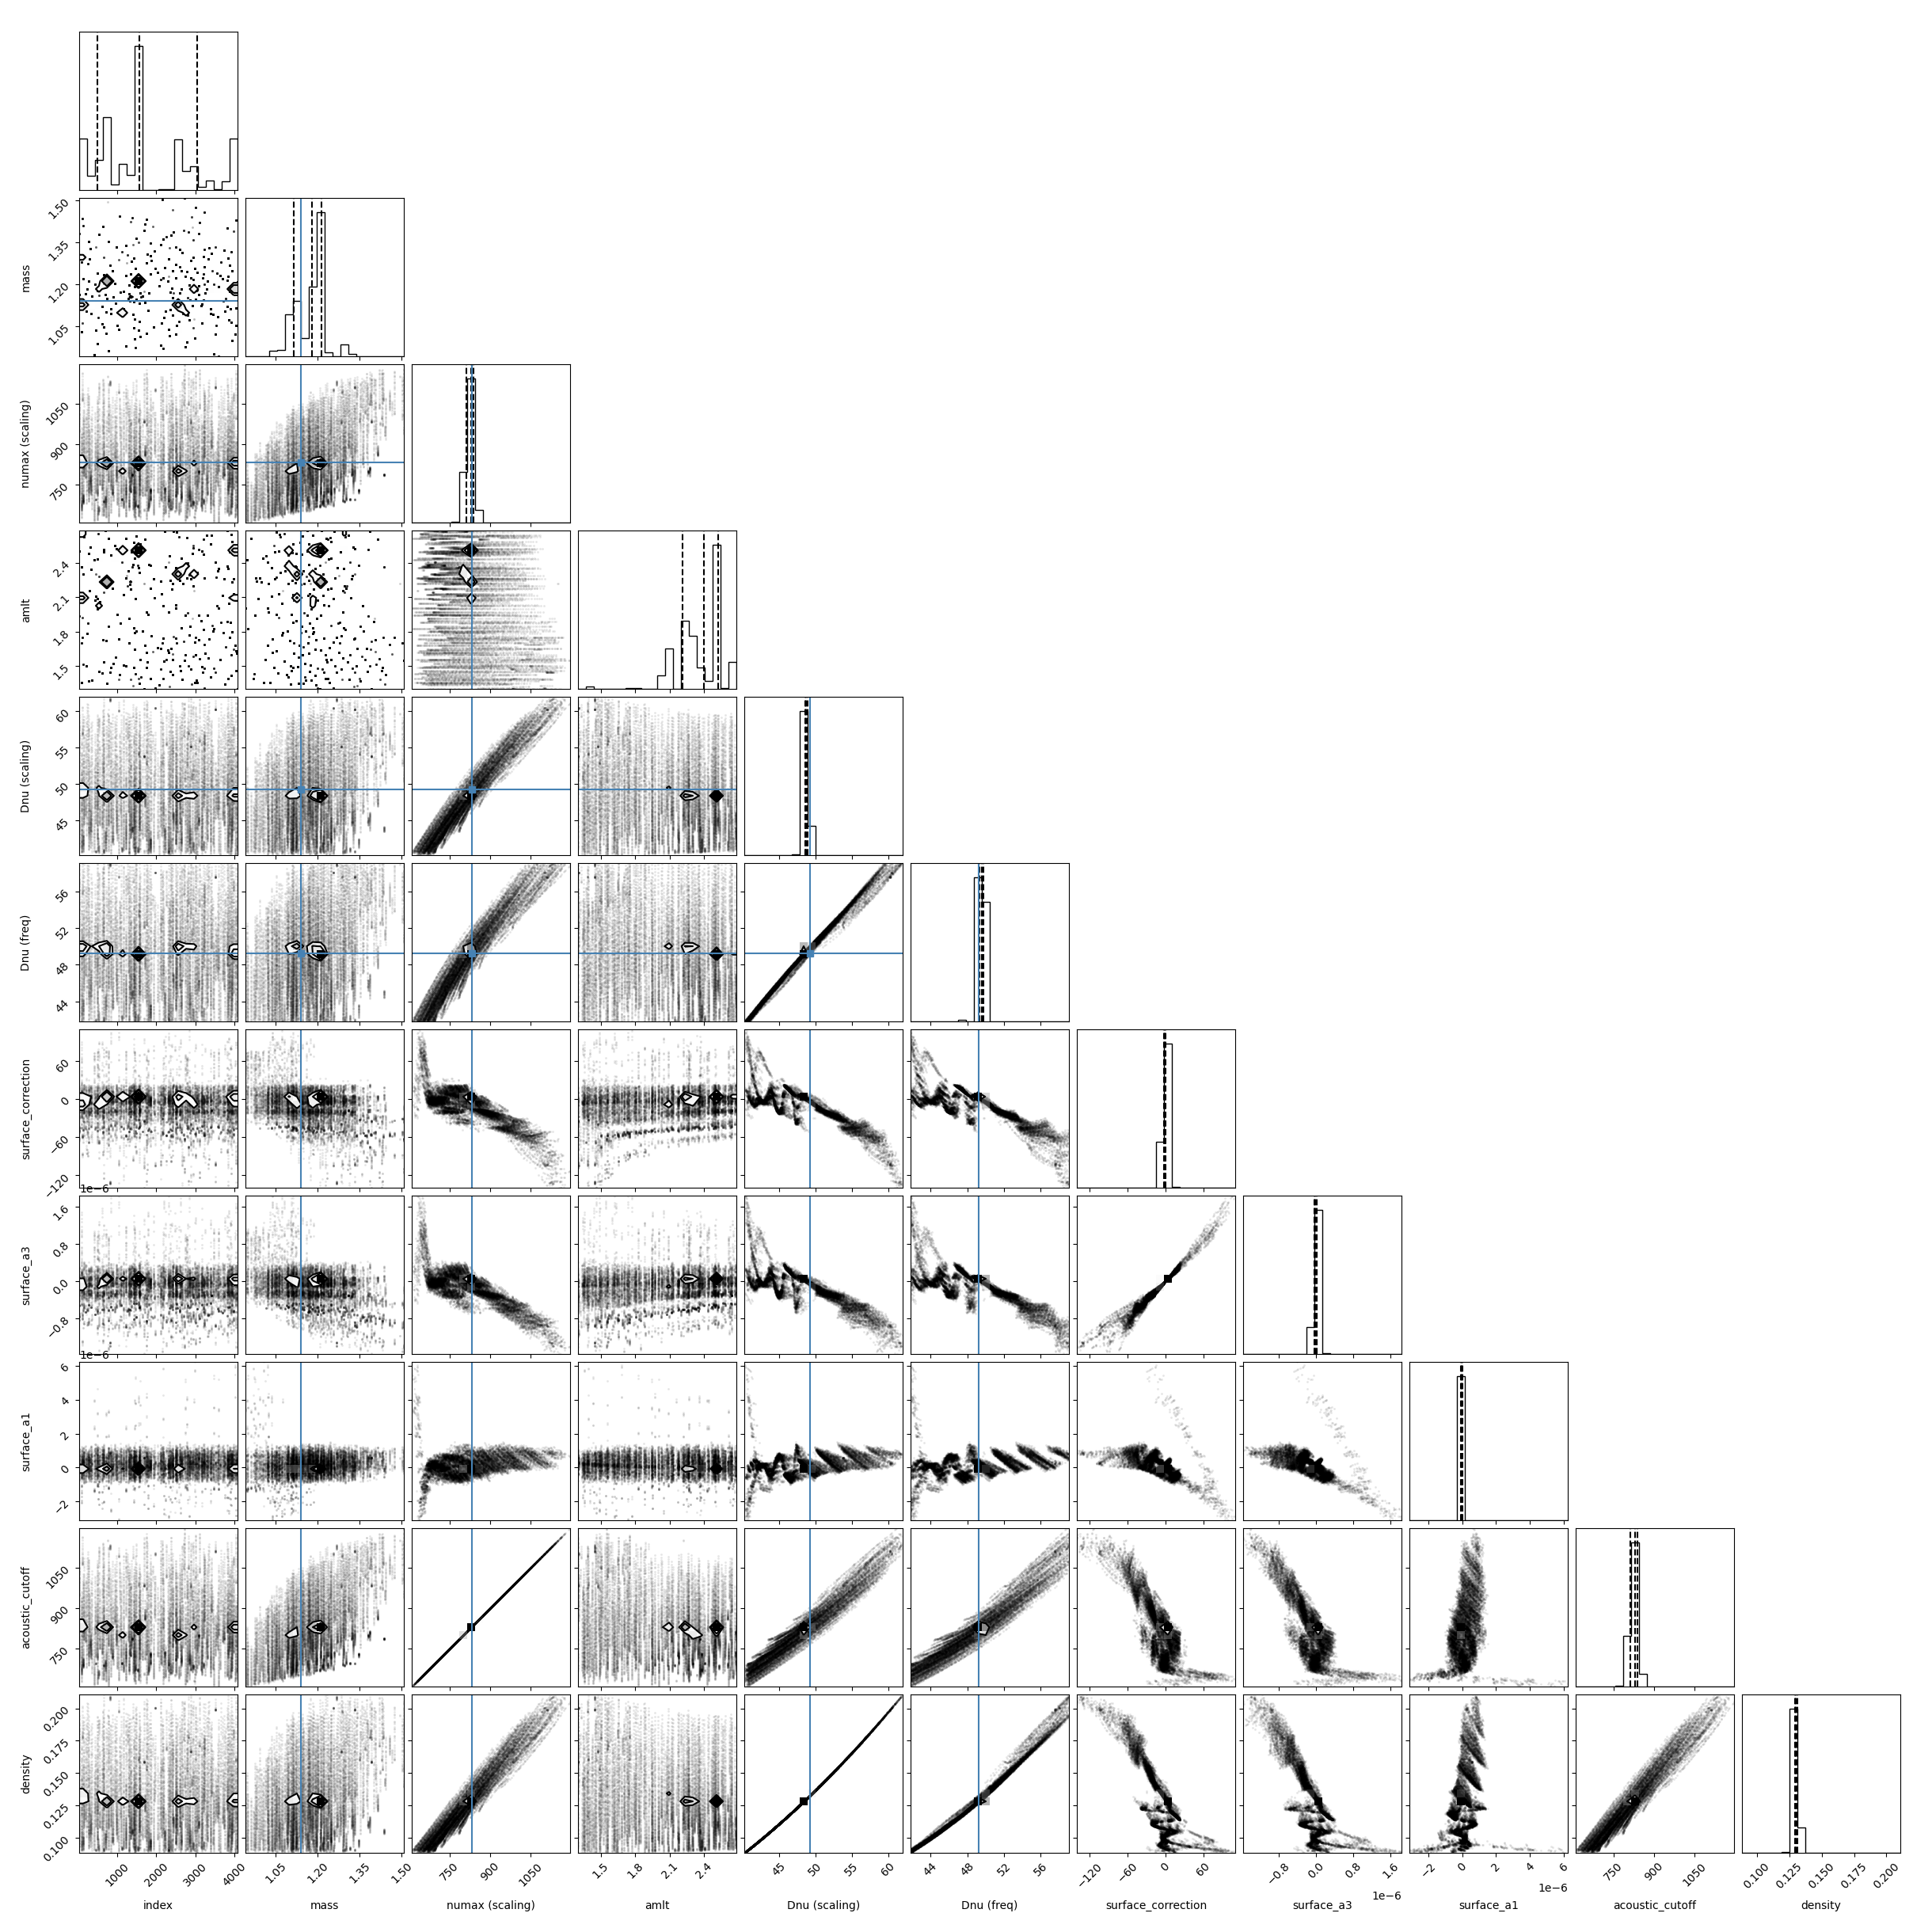

In [70]:
from IPython.display import Image
# Image(rootpath+'hpc/coarse_v2/results/005955122/echelle_top10_prob_seismic.png')
Image(rootpath+'hpc/coarse_v2/results/005955122/corner_prob_surface.png')

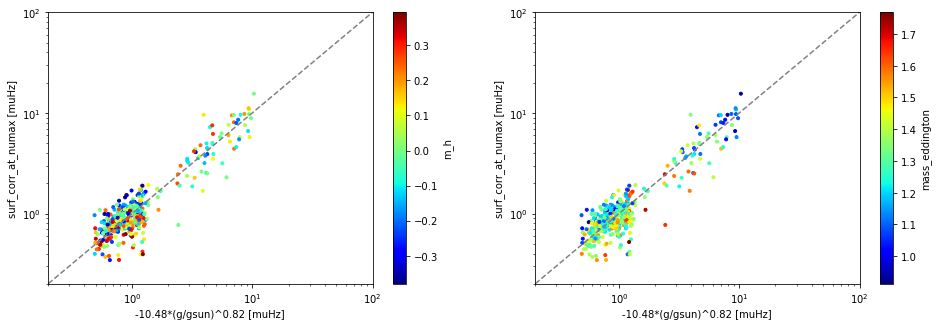

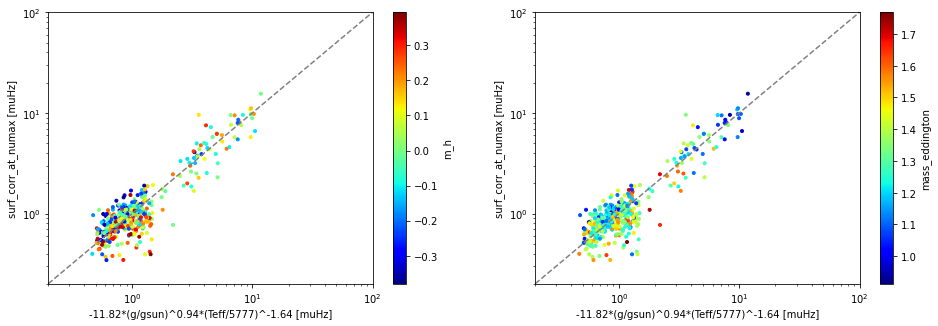

In [23]:
idx = np.isfinite(kepler['g_eddington']) & np.isfinite(kepler['Teff_eddington']) \
    & (kepler['surf_corr_eddington']<0) & (kepler['surf_corr_Dnu_eddington']<0)


xdata = np.array(kepler.loc[idx,'g_eddington'])
ydata = np.array(kepler.loc[idx,'surf_corr_eddington'])

popt, pcov = curve_fit(model1, xdata, ydata)
ymodel = model1(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_eddington']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('{:0.2f}*(g/gsun)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax [muHz]')
    ax.plot([0.1, 1000], [0.1, 1000], color='gray', linestyle='--')
    ax.axis([0.2, 100, 0.2, 100])

    plt.colorbar(c, ax=ax).set_label(var[iax])
    

    
xdata = np.swapaxes(np.array([kepler.loc[idx,'g_eddington'], kepler.loc[idx,'Teff_eddington']]), 0, 1)
ydata = np.array(kepler.loc[idx,'surf_corr_eddington'])

popt, pcov = curve_fit(model2, xdata, ydata)
ymodel = model2(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_eddington']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('{:0.2f}*(g/gsun)^{:0.2f}*(Teff/5777)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax [muHz]')
    ax.plot([0.1, 1000], [0.1, 1000], color='gray', linestyle='--')
    ax.axis([0.2, 100, 0.2, 100])

    plt.colorbar(c, ax=ax).set_label(var[iax])
    
    
# xdata = np.swapaxes(np.array([kepler.loc[idx,'g_eddington'], kepler.loc[idx,'Teff_eddington'],
#                              10.0**kepler.loc[idx,'m_h']]), 0, 1)
# ydata = np.array(kepler.loc[idx,'surf_corr_eddington'])

# popt, pcov = curve_fit(model3, xdata, ydata)
# ymodel = model3(xdata, *popt)

# fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
# axes = axes.reshape(-1)

# var = ['m_h', 'mass_eddington']
# for iax, ax in enumerate(axes):
#     c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlabel('{:0.2f}*(g/gsun)^{:0.2f}*(Teff/5777)^{:0.2f}*(10^[M/H])^{:0.2f} [muHz]'.format(*popt))
#     ax.set_ylabel('surf_corr_at_numax [muHz]')
#     ax.plot([0.1, 1000], [0.1, 1000], color='gray', linestyle='--')
#     ax.axis([0.2, 100, 0.2, 100])

#     plt.colorbar(c, ax=ax).set_label(var[iax])

6.0

# Fit the dimensionless surf_corr_at_numax/Dnu

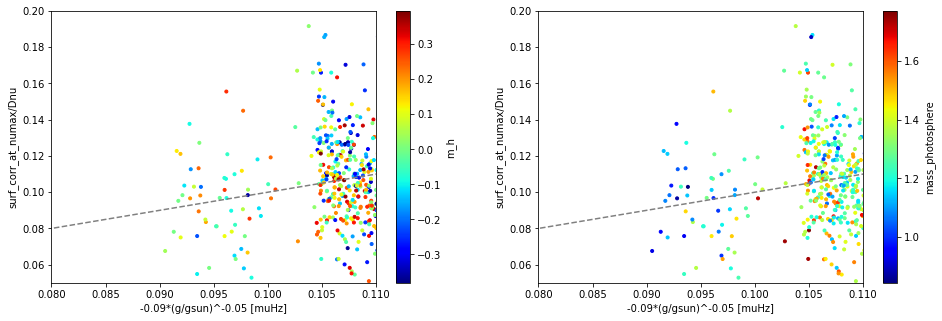

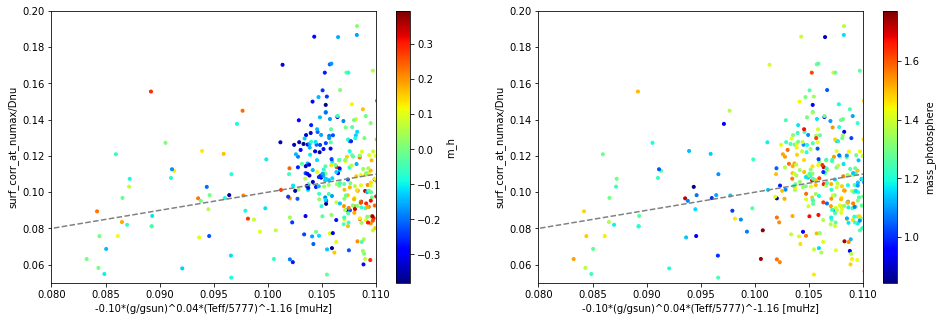

In [12]:
idx = np.isfinite(kepler['g_photosphere']) & np.isfinite(kepler['Teff_photosphere']) \
    & (kepler['surf_corr_photosphere']<0) & (kepler['surf_corr_Dnu_photosphere']<0)


xdata = np.array(kepler.loc[idx,'g_photosphere'])
ydata = np.array(kepler.loc[idx,'surf_corr_Dnu_photosphere'])

popt, pcov = curve_fit(model1, xdata, ydata)
ymodel = model1(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_photosphere']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.2f}*(g/gsun)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/Dnu')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.08, 0.11, 0.05, 0.2])

    plt.colorbar(c, ax=ax).set_label(var[iax])
    

xdata = np.swapaxes(np.array([kepler.loc[idx,'g_photosphere'], kepler.loc[idx,'Teff_photosphere']]), 0, 1)
ydata = np.array(kepler.loc[idx,'surf_corr_Dnu_photosphere'])

popt, pcov = curve_fit(model2, xdata, ydata)
ymodel = model2(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_photosphere']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.2f}*(g/gsun)^{:0.2f}*(Teff/5777)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/Dnu')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.08, 0.11, 0.05, 0.2])

    plt.colorbar(c, ax=ax).set_label(var[iax])

In [34]:
idx = kepler['names']=='Sun'
kepler.loc[idx, ['surf_corr_eddington','surf_corr_photosphere','mass_photosphere','e_mass_photosphere','radius_photosphere','e_radius_photosphere']]

,surf_corr_eddington,surf_corr_photosphere,mass_photosphere,e_mass_photosphere,radius_photosphere,e_radius_photosphere
126,-13.825635,-10.513041,0.94816,0.05066,0.980261,0.019074


# Fit the dimensionless surf_corr_at_numax/numax

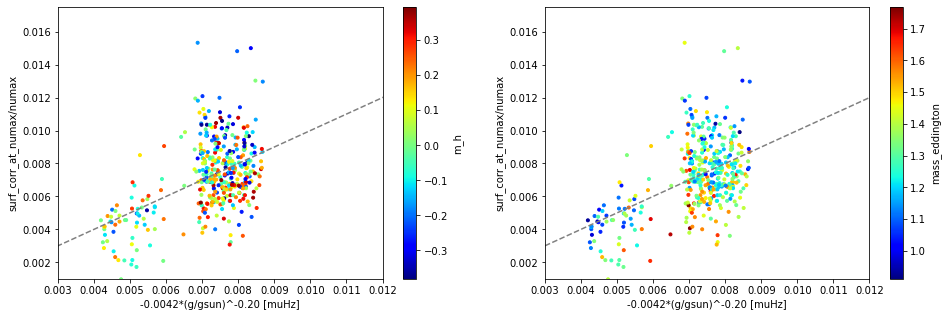

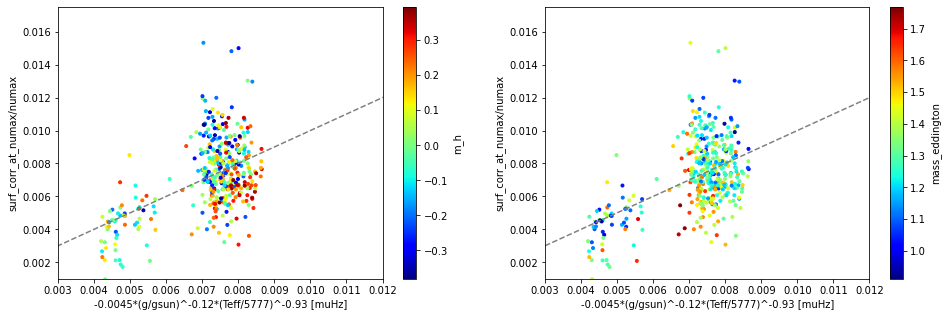

In [14]:
idx = np.isfinite(kepler['g_eddington']) & np.isfinite(kepler['Teff_eddington']) \
    & (kepler['surf_corr_eddington']<0) & (kepler['surf_corr_numax_eddington']<0)


xdata = np.array(kepler.loc[idx,'g_eddington'])
ydata = np.array(kepler.loc[idx,'surf_corr_numax_eddington'])

popt, pcov = curve_fit(model1, xdata, ydata)
ymodel = model1(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_eddington']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.4f}*(g/gsun)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/numax')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.003, 0.012, 0.001, 0.0175])

    plt.colorbar(c, ax=ax).set_label(var[iax])
    

    
xdata = np.swapaxes(np.array([kepler.loc[idx,'g_eddington'], kepler.loc[idx,'Teff_eddington']]), 0, 1)
ydata = np.array(kepler.loc[idx,'surf_corr_numax_eddington'])

popt, pcov = curve_fit(model2, xdata, ydata)
ymodel = model2(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_eddington']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.4f}*(g/gsun)^{:0.2f}*(Teff/5777)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/numax')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.003, 0.012, 0.001, 0.0175])

    plt.colorbar(c, ax=ax).set_label(var[iax])

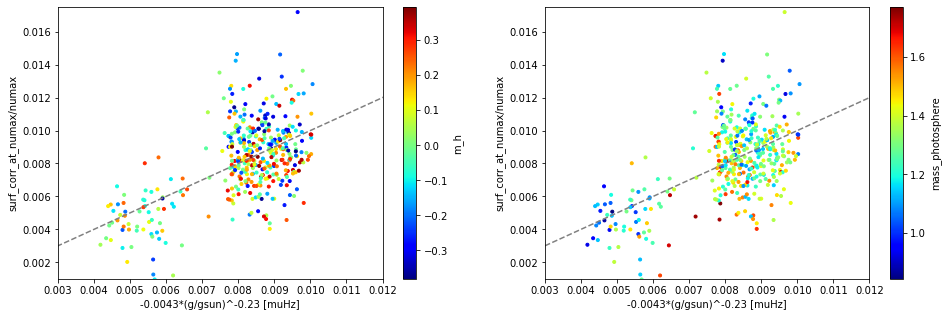

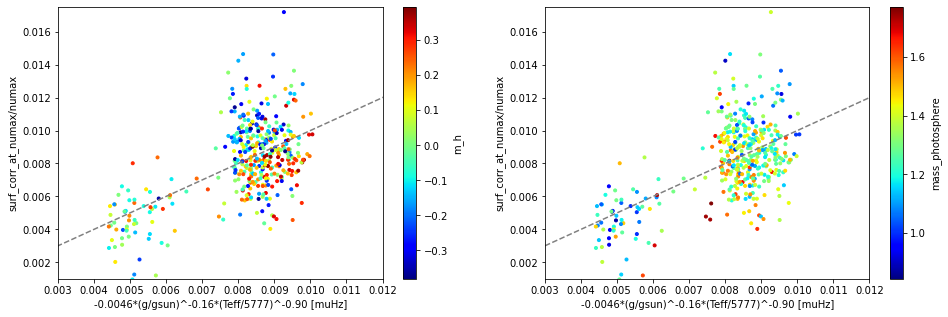

In [15]:
idx = np.isfinite(kepler['g_photosphere']) & np.isfinite(kepler['Teff_photosphere']) \
    & (kepler['surf_corr_photosphere']<0) & (kepler['surf_corr_numax_photosphere']<0)


xdata = np.array(kepler.loc[idx,'g_photosphere'])
ydata = np.array(kepler.loc[idx,'surf_corr_numax_photosphere'])

popt, pcov = curve_fit(model1, xdata, ydata)
ymodel = model1(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_photosphere']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.4f}*(g/gsun)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/numax')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.003, 0.012, 0.001, 0.0175])

    plt.colorbar(c, ax=ax).set_label(var[iax])
    

    
xdata = np.swapaxes(np.array([kepler.loc[idx,'g_photosphere'], kepler.loc[idx,'Teff_photosphere']]), 0, 1)
ydata = np.array(kepler.loc[idx,'surf_corr_numax_photosphere'])

popt, pcov = curve_fit(model2, xdata, ydata)
ymodel = model2(xdata, *popt)

fig, axes = plt.subplots(figsize=(16,5), nrows=1, ncols=2, squeeze=False)
axes = axes.reshape(-1)

var = ['m_h', 'mass_photosphere']
for iax, ax in enumerate(axes):
    c=ax.scatter(-ymodel, -ydata, marker='.', c=kepler.loc[idx,var[iax]], cmap='jet')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('{:0.4f}*(g/gsun)^{:0.2f}*(Teff/5777)^{:0.2f} [muHz]'.format(*popt))
    ax.set_ylabel('surf_corr_at_numax/numax')
    ax.plot([0.001, 1000], [0.001, 1000], color='gray', linestyle='--')
    ax.axis([0.003, 0.012, 0.001, 0.0175])

    plt.colorbar(c, ax=ax).set_label(var[iax])